In [1]:
import open3d as o3d
import numpy as np

In [2]:
#Camera parameters
C = 1.00014
F = C
D = -0.000057592800000000002
E = 0.000114813

cx = 1838.8699999999999
cy = 2717.1599999999999

width = 5472
heigth = 3648

dis = np.array([[C,D],[E,F]])
###print(dis)
pp = np.array([[cx],[cy]])
#print(pp)

img = o3d.io.read_image(r"K:\Projects\2025-02 Project BAEKELAND MEETHET\7.Recordings\2020-11-MEET_HET_HQ\VLX\SAM_Test_HQ_VLX_2020.12.16\datasets_proc\2020-12-16_09.23.14\cam\00000-cam0.jpg")

#o3d.visualization.draw_geometries([img])

new_image = np.empty([width, heigth,3], dtype = np.int8)
#print(new_image[5,10,:])
#print(np.shape(new_image))
#print(np.shape(np.asarray(img)))
h = 0
w = 0

while h < heigth:
    w = 0
    while w < width:
        x = np.array([[w],[h]])
        d = np.dot(dis,x) - pp
        
        xd = int(d[0])
        yd = int(d[1])
        try:
            new_image[w,h] = np.asarray(img)[xd,yd]
        except:
            new_image[w,h] = [100,100,100]
        w = w + 1
    h = h + 1

print(np.asarray(new_image))
img2 = o3d.geometry.Image((new_image))
o3d.visualization.draw_geometries([img2])

[[[  92   90   78]
  [ 100   97   88]
  [ 109  106  101]
  ...
  [ 106  105  100]
  [  99  100   94]
  [  99   98   93]]

 [[ 100   98   86]
  [ 104  101   92]
  [ 114  111  106]
  ...
  [ 105  102   97]
  [ 101  100   95]
  [ 100   97   92]]

 [[ 101   97   86]
  [ 114  110  101]
  [ 118  113  109]
  ...
  [ 101   97   94]
  [ 102   99   94]
  [  99   96   91]]

 ...

 [[ 121  125 -122]
  [ 122  126 -121]
  [ 124 -127 -121]
  ...
  [   0    0    0]
  [   0    0    0]
  [   0    0    0]]

 [[ 121  126 -124]
  [ 123 -128 -124]
  [ 124 -127 -123]
  ...
  [   0    0    0]
  [   0    0    0]
  [   0    0    0]]

 [[ 125 -126 -123]
  [ 127 -123 -123]
  [ 126 -124 -124]
  ...
  [   0    0    0]
  [   0    0    0]
  [   0    0    0]]]


In [3]:
new_image = np.empty([heigth, width,3], dtype = np.int8)
#print(new_image)
h = 0

while h < heigth:
    w = 0
    while w < width:
        new_image[h,w] = [100,100,100]
        w = w + 1
    
    h = h + 1


img2 = o3d.geometry.Image((new_image))
print(img2)
print(np.asarray(img2))

o3d.visualization.draw_geometries([img2])


Image of size 5472x3648, with 3 channels.
Use numpy.asarray to access buffer data.
[[[100 100 100]
  [100 100 100]
  [100 100 100]
  ...
  [100 100 100]
  [100 100 100]
  [100 100 100]]

 [[100 100 100]
  [100 100 100]
  [100 100 100]
  ...
  [100 100 100]
  [100 100 100]
  [100 100 100]]

 [[100 100 100]
  [100 100 100]
  [100 100 100]
  ...
  [100 100 100]
  [100 100 100]
  [100 100 100]]

 ...

 [[100 100 100]
  [100 100 100]
  [100 100 100]
  ...
  [100 100 100]
  [100 100 100]
  [100 100 100]]

 [[100 100 100]
  [100 100 100]
  [100 100 100]
  ...
  [100 100 100]
  [100 100 100]
  [100 100 100]]

 [[100 100 100]
  [100 100 100]
  [100 100 100]
  ...
  [100 100 100]
  [100 100 100]
  [100 100 100]]]


K:
 [[8.97381661e+03 0.00000000e+00 1.83887000e+03]
 [0.00000000e+00 8.97381661e+03 2.71716000e+03]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
D:
 [ -1.13553   6.32759 -13.1672    9.50479]
Grayscale Image Dimension:
 (5472, 3648)
Newly estimated K:
 [[7.83841626e+03 0.00000000e+00 1.83662580e+03]
 [0.00000000e+00 7.83841626e+03 2.70741627e+03]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
Rectify Map1 Dimension:
 (3648, 5472)
Rectify Map2 Dimension:
 (3648, 5472)


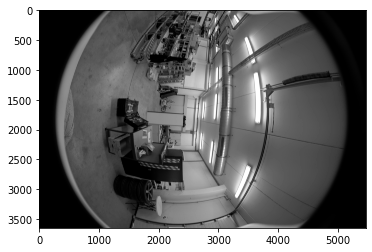

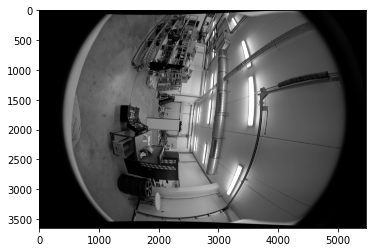

<Figure size 432x288 with 0 Axes>

In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

K = np.asarray([[8973.81661,0,1838.87],[0,8973.81661,2717.16],[0,0,1]])
D = np.asarray([[-1.13553],[6.32759],[-13.1672],[9.50479]])
print("K:\n", K)
print("D:\n", D.ravel())

# read image and get the original image on the left
image_path = r"K:\Projects\2025-02 Project BAEKELAND MEETHET\7.Recordings\2020-11-MEET_HET_HQ\VLX\SAM_Test_HQ_VLX_2020.12.16\datasets_proc\2020-12-16_09.23.14\cam\00000-cam0.jpg"
image = cv2.imread(image_path)
image = image[:, :image.shape[1], :]
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

fig = plt.figure()
plt.imshow(image_gray, "gray")

H_in, W_in = image_gray.shape
print("Grayscale Image Dimension:\n", (W_in, H_in))

scale_factor = 1.0 
balance = 1.0

img_dim_out =(int(W_in*scale_factor), int(H_in*scale_factor))
if scale_factor != 1.0:
    K_out = K*scale_factor
    K_out[2,2] = 1.0
else:
    K_out = K

K_new = cv2.fisheye.estimateNewCameraMatrixForUndistortRectify(K_out, D, img_dim_out, np.eye(3), balance=balance)
print("Newly estimated K:\n", K_new)

map1, map2 = cv2.fisheye.initUndistortRectifyMap(K, D, np.eye(3), K_new, img_dim_out, cv2.CV_32FC1)
print("Rectify Map1 Dimension:\n", map1.shape)
print("Rectify Map2 Dimension:\n", map2.shape)

undistorted_image_gray = cv2.remap(image_gray, map1, map2, interpolation=cv2.INTER_LINEAR, borderMode=cv2.BORDER_CONSTANT)
fig = plt.figure()
plt.imshow(undistorted_image_gray, "gray")
  
# ret, corners = cv2.findChessboardCorners(image_gray, (6,8),cv2.CALIB_CB_ADAPTIVE_THRESH+cv2.CALIB_CB_FAST_CHECK+cv2.CALIB_CB_NORMALIZE_IMAGE)
# corners_subpix = cv2.cornerSubPix(image_gray, corners, (3,3), (-1,-1), (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 1))

# undistorted_corners = cv2.fisheye.undistortPoints(corners_subpix, K, D)
# undistorted_corners = undistorted_corners.reshape(-1,2)


# fx = K_new[0,0]
# fy = K_new[1,1]
# cx = K_new[0,2]
# cy = K_new[1,2]
# undistorted_corners_pixel = np.zeros_like(undistorted_corners)

# for i, (x, y) in enumerate(undistorted_corners):
#     px = x*fx + cx
#     py = y*fy + cy
#     undistorted_corners_pixel[i,0] = px
#     undistorted_corners_pixel[i,1] = py
    
# undistorted_image_show = cv2.cvtColor(undistorted_image_gray, cv2.COLOR_GRAY2BGR)
# for corner in undistorted_corners_pixel:
#     image_corners = cv2.circle(np.zeros_like(undistorted_image_show), (int(corner[0]),int(corner[1])), 15, [0, 255, 0], -1)
#     undistorted_image_show = cv2.add(undistorted_image_show, image_corners)

fig = plt.figure()
# plt.imshow(undistorted_image_show, "gray")